In [86]:
using Plots, DifferentialEquations, LaTeXStrings, Printf

$$
\frac{d W}{d p} = \left( \frac{2 p}{p^2 + Q} - \frac{1}{p} \right) W - \frac{W^2}{p} + p Q (p^2 + Q)
$$

$$
W(\infty) = - Q^{1/2} p^2 - \frac{1}{2}
$$

In [96]:
# Define the ODE function with parameters
f(w, p, t) = ((2t)/(t^2+Q) - (1/t))*w - (w^2/t) + t*Q*(t^2+Q)

# Parameters (using a NamedTuple for clarity)
params = (Q = 0.75,)

# Time span (integrating backward in time)
tspan = (15.0, 1e-8)  # Avoid t=0 to prevent division by zero

# Initial condition
w0 = -sqrt(params.Q) * tspan[1]^2 - 0.5

# Create the ODE problem with parameters
prob = ODEProblem(f, w0, tspan, params)

# Solve with a stiff solver (Rodas5 is good for stiff problems)
sol = solve(prob, Rodas5(), reltol=1e-8, abstol=1e-8);

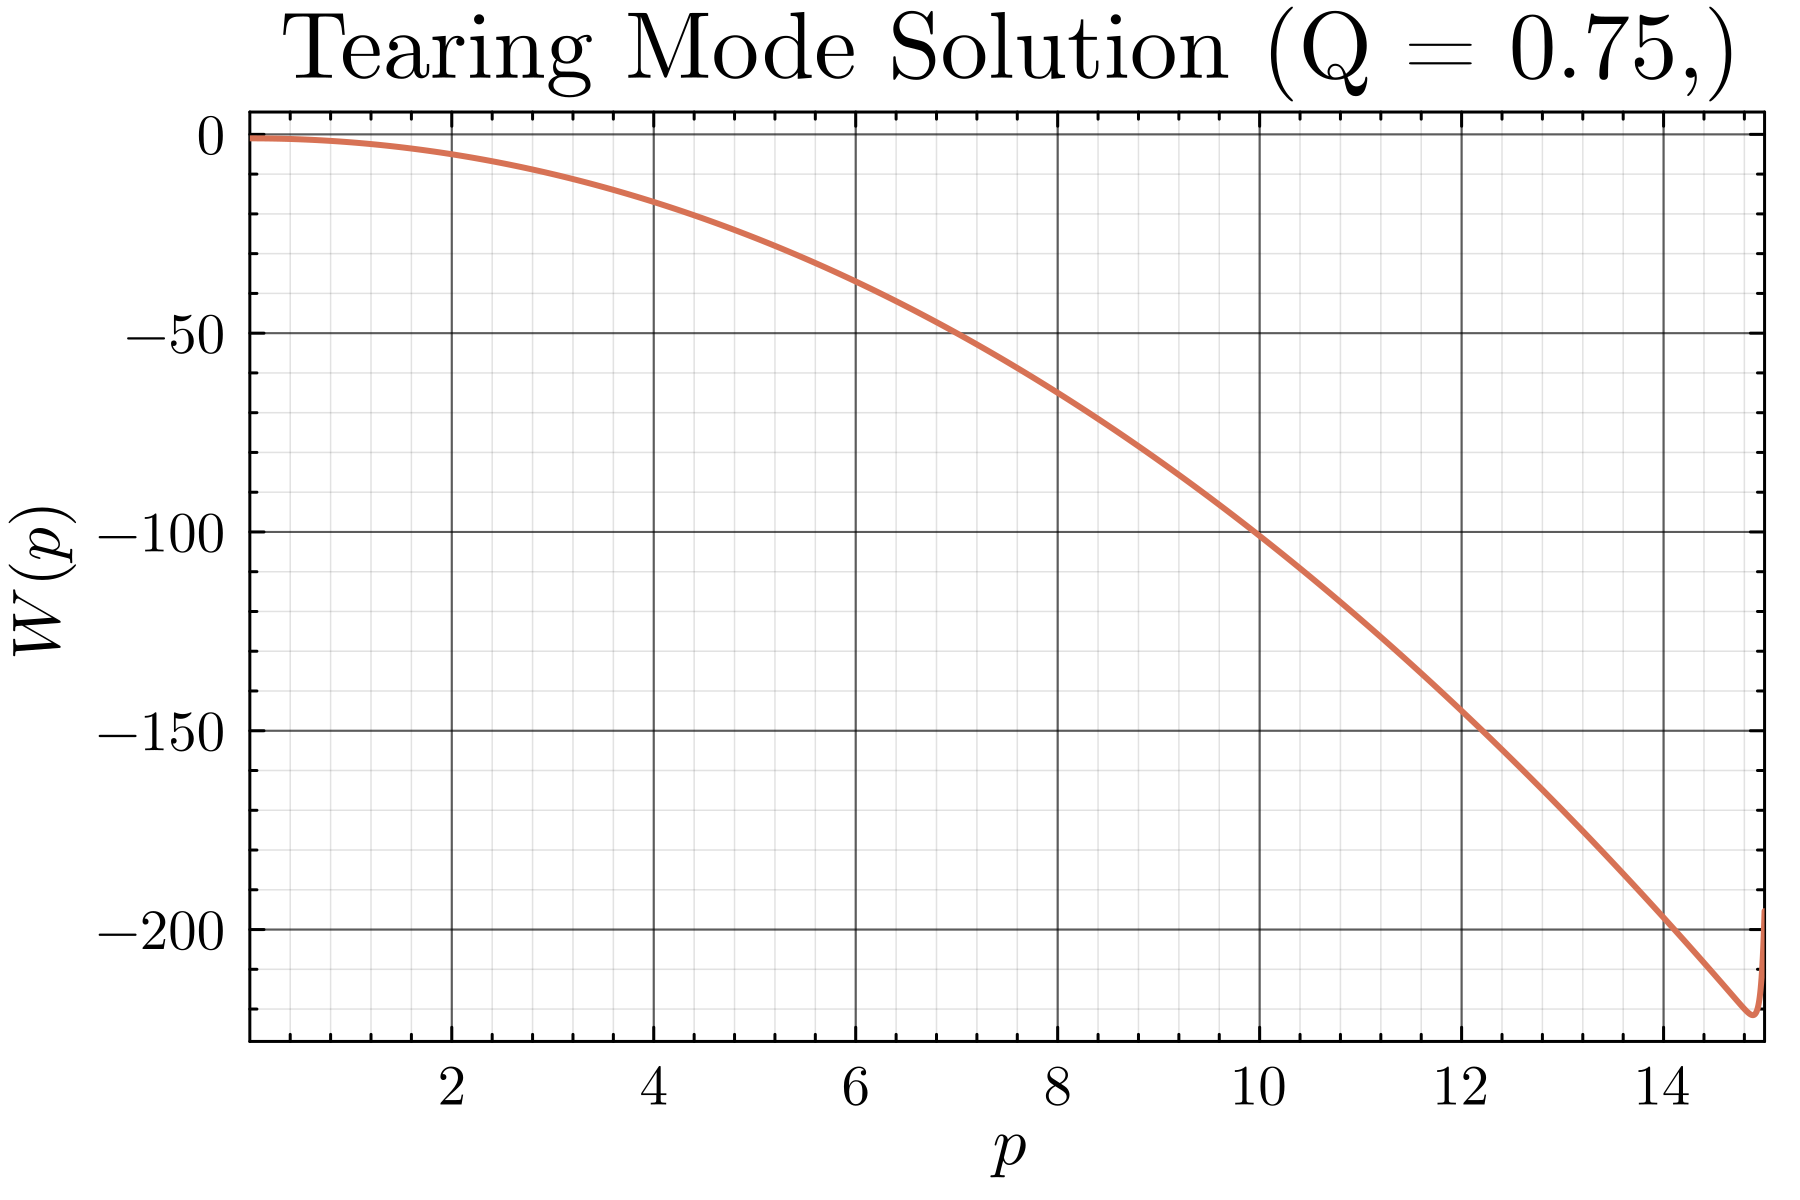

In [115]:
theme(:dao)
plot(sol, 
    title = "Tearing Mode Solution $params",
    idxs=[1],
    line=(2, :solid),
    xlabel=L"$p$",
    ylabel=L"$W(p)$",
    legend=:false,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    dpi=300,
    xflip=false
    )

In [108]:
# Compute W'(t) at the smallest t in the solution (near t=0)
t_min = minimum(sol.t)  # Closest point to t=0 (e.g., t=1e-6)
W_prime_near_0 = sol(t_min, Val{1})  # First derivative at t_min

# Extrapolate W'(0) ≈ W'(t_min) + O(t_min) (assumes W' is finite at t=0)
W_prime_0 = W_prime_near_0  # Or refine with fitting if needed

# Compute π / W'(0)
Δhat = π / W_prime_0

-23816.2735071724

In [110]:
log10(abs(Δhat))

4.376873809124967